<a href="https://colab.research.google.com/github/daniel542813x/deepLearning/blob/main/RedNeuronalConNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_gaussian_quantiles

In [153]:
N = 1000
gaussian_quantiles= make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features = 2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None
                        )
X , Y = gaussian_quantiles

In [154]:
Y = Y[:,np.newaxis]
X.shape

(1000, 2)

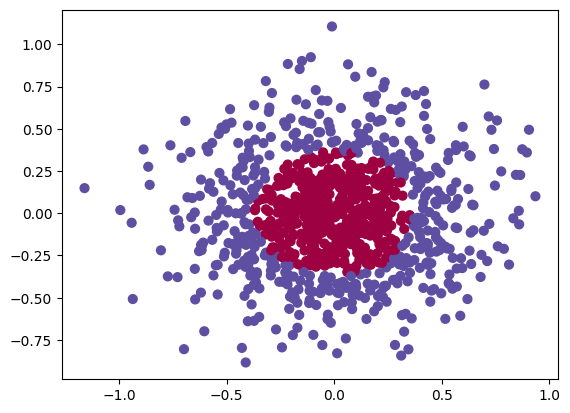

In [155]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [5]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:
        return np.maximum(0, x)

def mse(y,y_hat,derivate=False):
  if derivate:
    return (y_hat -y )
  else:
    return np.mean((y_hat - y )**2)

In [136]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [137]:
def forward(params,X):
  params['A0']=X
  for l in range(1,len(layers_dim)-1):
    params[f'Z{l}'] = np.matmul(params[f'A{l-1}'],params[f'W{l}']) + params[f'b{l}']
    params[f'A{l}'] = relu(params[f'Z{l}'])
  params[f'Z{len(layers_dim)-1}'] = np.matmul(params[f'A{len(layers_dim)-2}'],params[f'W{len(layers_dim)-1}']) + params[f'b{len(layers_dim)-1}']
  params[f'A{len(layers_dim)-1}']=sigmoid(params[f'Z{len(layers_dim)-1}'])
  return params[f'A{len(layers_dim)-1}']


In [162]:
#Calcutale derivates
def train(X,Y,params,lr=0.05,iter=500):
  error=[]
  for i in range(0,iter):
    output = forward(params,X)

    if i % 50 == 0:
      error.append(mse(Y,output,True))

    params['dZ3'] = mse(Y,output,True) * sigmoid(params['A3'],True)
    params['dW3'] = params['A2'].T@params['dZ3']

    params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
    params['dW2'] = params['A1'].T@params['dZ2']

    params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
    params['dW1'] = params['A0'].T@params['dZ1']

    output = forward(params,X)

    # update weigtes

    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - (np.mean(params['dW3'],axis=0,keepdims=True) ) * lr

    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0,keepdims=True) ) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - (np.mean(params['dW1'],axis=0,keepdims=True) ) * lr

  output = forward(params,X)

  return output, error

In [166]:
layers_dim=[2,4,8,1]
params = initialize_parameters_deep(layers_dim)
output, error = train(X,Y,params)


ValueError: ignored

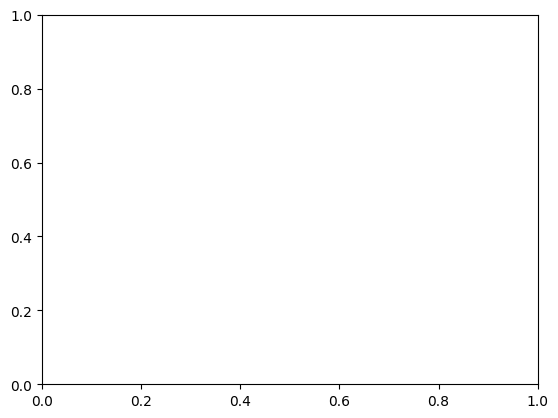

In [165]:
plt.plot(error)